In [192]:
import os
import networkx as nx
import pickle

folder_path = 'datasets'
# ULONG_MAX 18446744073709551615

In [193]:
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

def save_dic(d,s):
    with open(s+'.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

In [66]:
l = [["astro_ph","u"], ["power_grid", "u"], ["hamster_full","u"], ["linux_mail","d"], ["slashdot", "d"], ["milan", "d"], ["vienna","d"], ["paris","d"] ]
#l = [["power_grid", "u"], ["hamster_full","u"], ["aachen", "d"]]

In [67]:
#launch pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
j = 0
for x in l:
    file_path = folder_path + "/" + x[0] + ".edge"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,x[1], alg, str(0), str(1), str(1), 'c']) 
    j += 1

filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
salut
******************************
count operations not time
0.004000 ms.
19 operations.
end queries
filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
salut
******************************
count operations not time
0.004000 ms.
19 operations.
end queries
filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loo

In [68]:
info = dict()
for x in l:
    info[x[0]] = dict()
    file_path = folder_path + "/" + x[0] + ".edge"
    with open(file_path,'r') as f:
        edges = set()
        nodes = set()
        nb_edges = 0
        for line in f:
            nb_edges += 1
            r = line.split()
            edges.add((r[0],r[1]))
            nodes.add(r[0])
            nodes.add(r[1])
    info[x[0]] = (len(nodes), len(edges))
info

{'power_grid': (4941, 6594),
 'hamster_full': (2426, 16631),
 'aachen': (3843, 8980)}

In [88]:
import random
def random_pairs(n, infos, x, max_tries_per_node = 1000, more_than_one = 0):
    nb = 0
    res = []
    while nb < n:
        print("nb", nb, end = " ")
        j = random.randint(0, infos[x[0]][0]-1)
        file_path = folder_path + "/" + x[0] + "_b-unrank/nb_paths_" + str(j) + ".csv"
        file_path2 = folder_path + "/" + x[0] + "_b-unrank/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        ll2 = read_integers_from_file(file_path2)
        tent = 0
        while tent < max_tries_per_node:
            k = random.randint(0, infos[x[0]][0]-1)
            #print("len ll ", len(ll), "k", k)
            if ll[k] != 0 and k!=j:
                if more_than_one:
                    if ll[k] > 1:
                        break
                else:
                    break
            tent += 1
        if tent < max_tries_per_node:
            res.append([[j,k], ll2[k], ll[k]])
            nb += 1
    return res
            
def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [89]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

# distances = dict()
# d_dist = dict()
# for x in l:
#     distances[x[0]] = dict()
#     d_dist[x[0]] = dict()
#     j = 0
#     while True:
#         file_path = folder_path + "/" + x[0] + "_b-unrank/distances_" + str(j) + ".csv"
#         if file_exists(file_path):
#             ll = read_integers_from_file(file_path)
#             for z in range(len(ll)):
#                 if ll[z] in d_dist[x[0]]:
#                     d_dist[x[0]][ll[z]].append((j,z))
#                 else:
#                     d_dist[x[0]][ll[z]] = [(j,z)]
#                 distances[x[0]][(j,z)] = ll[z]
#                 #distances[x[0]][(z,j)] = ll[z]
#         else:
#             # we have reached the number of nodes
#             break
#         j += 1

In [90]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 5000
nb_pairs = 100
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    file_path = folder_path + "/" + x[0]  + ".edge"
    print("filepath", file_path)
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    ll = random_pairs(nb_pairs, info, x)
    if ll == -1:
        print("problem pair sampling")
        break
    #print(ll)
    for e in ll:
        print("current", e)
        for alg in algos:
            print("current alg", alg)
            subprocess.run(["./main", file_path ,x[1], alg, str(e[0][0]), str(e[0][1]), str(nb_queries_per_pair), "c"])
            file =  x[0] + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x[0]][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * e[1] ))
            

filepath datasets/power_grid.edge
current [[1182, 2098], 13, 3]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
2.711000 ms.
849461 operations.
end queries
val 849461
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
2.822000 ms.
849461 operations.
end queries
val 849461
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
2.754000 ms.
779607 operations.
end queries
val 779607
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges :

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.739000 ms.
1389951 operations.
end queries
val 1389951
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
4.886000 ms.
1303504 operations.
end queries
val 1303504
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.455000 ms.
1135000 operations.
end queries
val 1135000
current [[942, 2229], 25, 18]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already prese

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.498000 ms.
1399787 operations.
end queries
val 1399787
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.812000 ms.
1285000 operations.
end queries
val 1285000
current [[2336, 685], 18, 4]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.777000 ms.
1149804 operations.
end queries
val 1149804
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already prese

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
4.685000 ms.
1192178 operations.
end queries
val 1192178
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.985000 ms.
1192178 operations.
end queries
val 1192178
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
4.179000 ms.
1042362 operations.
end queries
val 1042362
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.217000 ms.
1235000 operations.
end queries
val 1235000
current [[1200, 1452], 25, 12]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.831000 ms.
1605469 operations.
end queries
val 1605469
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.431000 ms.
1605469 operations.
end queries
val 1605469
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.380000 ms.
549839 operations.
end queries
val 549839
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.755000 ms.
529973 operations.
end queries
val 529973
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.293000 ms.
435000 operations.
end queries
val 435000
current [[4922, 1423], 18, 3]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
sta

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.384000 ms.
1558406 operations.
end queries
val 1558406
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.993000 ms.
1335000 operations.
end queries
val 1335000
current [[479, 4503], 29, 4]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.908000 ms.
1810504 operations.
end queries
val 1810504
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already prese

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
9.675000 ms.
1792596 operations.
end queries
val 1792596
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
14.078000 ms.
1735000 operations.
end queries
val 1735000
current [[1287, 3403], 19, 2]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.946000 ms.
1192465 operations.
end queries
val 1192465
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already pre

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.900000 ms.
1035607 operations.
end queries
val 1035607
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.401000 ms.
1004776 operations.
end queries
val 1004776
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
4.463000 ms.
835000 operations.
end queries
val 835000
current [[1891, 4219], 17, 2]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present

val 1630203
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
14.333000 ms.
1630203 operations.
end queries
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.372000 ms.
1450087 operations.
end queries
val 1450087
current alg alias-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.102000 ms.
1335000 operations.
end queries
val 1335000
current [[2208, 4504], 20, 6]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already pres

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.159000 ms.
785000 operations.
end queries
val 785000
current [[2950, 297], 12, 3]
current alg b-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.443000 ms.
790287 operations.
end queries
val 790287
current alg ob-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.017000 ms.
778597 operations.
end queries
val 778597
current alg i-unrank
Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start q

Graph name : datasets/power_grid
Number of nodes : 4941 number of edges : 6594
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.632000 ms.
785000 operations.
end queries
val 785000
filepath datasets/hamster_full.edge
current [[981, 2413], 5, 1]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.120000 ms.
335000 operations.
end queries
val 335000
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.104000 ms.
335000 operations.
end queries
val 335000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocess

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.360000 ms.
95000 operations.
end queries
val 95000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.364000 ms.
85000 operations.
end queries
val 85000
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.421000 ms.
85000 operations.
end queries
val 85000
current [[809, 1954], 4, 13]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already presen

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.719000 ms.
285000 operations.
end queries
val 285000
current [[324, 118], 2, 7]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.050000 ms.
245251 operations.
end queries
val 245251
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.555000 ms.
155000 operations.
end queries
val 155000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already prese

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.637000 ms.
373332 operations.
end queries
val 373332
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.458000 ms.
710816 operations.
end queries
val 710816
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.537000 ms.
285000 operations.
end queries
val 285000
current [[2267, 2122], 3, 11]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.029000 ms.
155000 operations.
end queries
val 155000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.688000 ms.
135000 operations.
end queries
val 135000
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.713000 ms.
135000 operations.
end queries
val 135000
current [[2387, 220], 2, 1]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already p

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.181000 ms.
439542 operations.
end queries
val 439542
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.157000 ms.
295699 operations.
end queries
val 295699
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.276000 ms.
575156 operations.
end queries
val 575156
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut


Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.394000 ms.
215000 operations.
end queries
val 215000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.693000 ms.
185000 operations.
end queries
val 185000
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.899000 ms.
185000 operations.
end queries
val 185000
current [[80, 57], 2, 13]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already pre

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.234000 ms.
255887 operations.
end queries
val 255887
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.787000 ms.
238772 operations.
end queries
val 238772
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.901000 ms.
318386 operations.
end queries
val 318386
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut


Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.862000 ms.
226767 operations.
end queries
val 226767
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.961000 ms.
371855 operations.
end queries
val 371855
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.941000 ms.
185000 operations.
end queries
val 185000
current [[2171, 1982], 5, 2]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already 

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.021000 ms.
185000 operations.
end queries
val 185000
current [[1142, 683], 3, 12]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.845000 ms.
259142 operations.
end queries
val 259142
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.734000 ms.
221230 operations.
end queries
val 221230
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already pre

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.728000 ms.
258276 operations.
end queries
val 258276
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.672000 ms.
284348 operations.
end queries
val 284348
current alg alias-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
0.657000 ms.
135000 operations.
end queries
val 135000
current [[1242, 2297], 4, 23]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already

Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.921000 ms.
185000 operations.
end queries
val 185000
current [[868, 1626], 5, 2]
current alg b-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.060000 ms.
335000 operations.
end queries
val 335000
current alg ob-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
1.056000 ms.
335000 operations.
end queries
val 335000
current alg i-unrank
Graph name : datasets/hamster_full
Number of nodes : 2426 number of edges : 16631
preprocessing for this type is already pres

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.647000 ms.
2386934 operations.
end queries
val 2386934
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.449000 ms.
2374412 operations.
end queries
val 2374412
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.741000 ms.
1958973 operations.
end queries
val 1958973
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
**********************

val 4855079
current alg ob-unrank
val 4802614
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.122000 ms.
1242350 operations.
end queries
val 1242350
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
6.226000 ms.
1185000 operations.
end queries
val 1185000
current [[8, 234], 55, 10]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
9.255000 ms.
3136363 operations.
end queries
val 3136363
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.780000 ms.
1715000 operations.
end queries
val 1715000
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.553000 ms.
1715000 operations.
end queries
val 1715000
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
5.851000 ms.
1435000 operations.
end queries
val 1435000
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
**********************

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.724000 ms.
1585000 operations.
end queries
val 1585000
current [[3810, 3114], 57, 4]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
13.114000 ms.
4088671 operations.
end queries
val 4088671
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
12.390000 ms.
4082465 operations.
end queries
val 4082465
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries


val 2566097
current alg ob-unrank
val 2604170
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.479000 ms.
1920130 operations.
end queries
val 1920130
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.516000 ms.
1635000 operations.
end queries
val 1635000
current [[2188, 1801], 39, 1]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.420000 ms.
2375000 operations.
end queries
val 2375000
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges

val 1485000
current [[252, 8], 42, 3]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
13.130000 ms.
3893897 operations.
end queries
val 3893897
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
11.291000 ms.
3895122 operations.
end queries
val 3895122
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.212000 ms.
2194930 operations.
end queries
val 2194930
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type 

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
17.912000 ms.
3290138 operations.
end queries
val 3290138
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
10.057000 ms.
3256058 operations.
end queries
val 3256058
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
9.136000 ms.
2548707 operations.
end queries
val 2548707
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
********************

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
11.775000 ms.
2285000 operations.
end queries
val 2285000
current [[2857, 1715], 11, 1]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
3.043000 ms.
695000 operations.
end queries
val 695000
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
2.445000 ms.
695000 operations.
end queries
val 695000
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
11.036000 ms.
1735000 operations.
end queries
val 1735000
current [[132, 925], 52, 2]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
11.872000 ms.
3276881 operations.
end queries
val 3276881
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
10.448000 ms.
3272478 operations.
end queries
val 3272478
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
s

val 2195000
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
15.846000 ms.
2195000 operations.
end queries
val 2195000
current alg i-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
7.384000 ms.
1835000 operations.
end queries
val 1835000
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
9.496000 ms.
1835000 operations.
end queries
val 1835000
current [[2453, 3427], 22, 2]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this ty

Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
8.464000 ms.
2197645 operations.
end queries
val 2197645
current alg alias-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
13.374000 ms.
2085000 operations.
end queries
val 2085000
current [[3051, 759], 30, 4]
current alg b-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queries
salut
******************************
count operations not time
10.285000 ms.
3574899 operations.
end queries
val 3574899
current alg ob-unrank
Graph name : datasets/aachen
Number of nodes : 3843 number of edges : 8980
preprocessing for this type is already present
start queri

In [78]:
# #launch simulations on er query time on long distance
# # last third of distances
# pair_dist = "long"
# max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


# nb_queries_per_pair = 500000
# nb_pairs = 30
# import subprocess
# algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
# d = { i: {alg:[]   for alg in algos}  for i in l }

# for x in l:
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     V = list(g.nodes())
#     pairs = []
#     if pair_dist == "long":
#         for zz in range(int(max_dist[i]*2/3), max_dist[i]):
#             pairs += d_dist[i][zz]
#     if pair_dist == "medium":
#         for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
#             pairs += d_dist[i][zz]
#     if pair_dist == "short":
#         for zz in range(int(max_dist[i]), max_dist[i]*1/3):
#             pairs += d_dist[i][zz]
#     ll = random_pairs_exact(nb_pairs, pairs)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         for alg in algos:
#             subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
#             file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
#             d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [80]:
# def name(i):
#     if i[0] != "gr":
#         return i[0]+"_"+str(i[1])
#     else:
#         return str(i[1][0])+"_"+str(i[1][1])

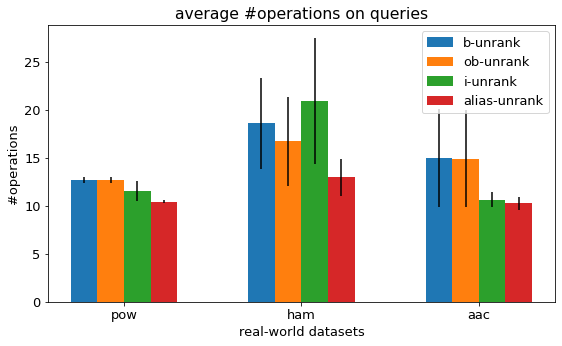

In [186]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"queries_real")
plot_bar_chart(data, "real-world datasets", "#operations", "average #operations on queries", "queries_real.pdf")

In [36]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [94]:
#launch bars on pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d_pre = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x[0]][alg] = ll

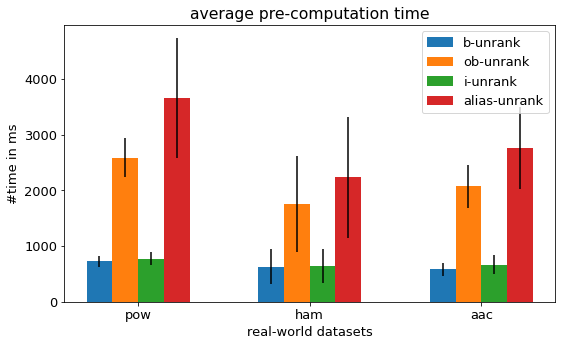

In [187]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d_pre[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"pre_comp_real")

plot_bar_chart(data, "real-world datasets", "#time in ms", "average pre-computation time", "pre_comp_real.pdf")

In [160]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")

In [153]:
def random_pairs_wasser(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res


def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
# def connected_gnp(n,p, max_tries = 10, directed = False):
#     i = 0
#     while i < max_tries:
#         g = nx.fast_gnp_random_graph(N, p, directed=directed)
#         if nx.is_connected(g):
#             return g
#         i += 1
#     return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
#     print("w", w)
#     for i in range(1,len(w)):
#         print("(", w[i],dag.in_degree(w[i]),")", end = " ")
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))

def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

In [154]:
import networkx as nx
def read_graph_edges(s):
    edges = set()
    with open(s,'r') as f:
        for line in f:
            x = line.split(" ")
            edges.add((x[0],x[1]))
    return list(edges)

In [171]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos
pair_dist = "average"
nb_pairs = 20
import subprocess
algos = ["random_weights", "URW"]
d_was = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x, info[x[0]])
    file_path = folder_path + "/" + x[0]  + ".edge"
    if x[1] == "u":
        g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    else:
        g = nx.read_edgelist(file_path, create_using=nx.DiGraph, data=False)
        
    ll = random_pairs(nb_pairs, info, x, more_than_one = 0)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        print(e)
        for alg in algos: 
            file =  x[0]+  "_" + "b-unrank" + "/"+ str(e[0][0]) + ".edges"
            #dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
            edges = read_graph_edges(folder_path+"/"+file)
            dag = nx.from_edgelist(edges, create_using=nx.DiGraph())
            sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=str(e[0][0]), target=str(e[0][1]))))
            print("nb shortest", len(sl))
            if alg == "random_weights":
                res = stat_random_weights(g,str(e[0][0]),str(e[0][1]),sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was[x[0]][alg].append(wr)
            

['power_grid', 'u'] (4941, 6594)
[[3163, 3409], 12, 8]
nb shortest 8
random_weights 0.04375
nb shortest 8
URW 0.04166666666666667
[[3180, 3529], 25, 3]
nb shortest 3
random_weights 0.04444444444444445
nb shortest 3
URW 0.1111111111111111
[[2191, 511], 18, 2]
nb shortest 2
random_weights 0.0
nb shortest 2
URW 0.0
[[2966, 4156], 12, 2]
nb shortest 2
random_weights 0.0
nb shortest 2
URW 0.0
[[2347, 2536], 22, 32]
nb shortest 32
random_weights 0.0099609375
nb shortest 32
URW 0.018229166666666668
[[4001, 2465], 25, 1]
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
[[65, 1702], 20, 8]
nb shortest 8
random_weights 0.03749999999999999
nb shortest 8
URW 0.0625
[[2426, 1655], 20, 2]
nb shortest 2
random_weights 0.0
nb shortest 2
URW 0.0
[[1270, 2151], 28, 6]
nb shortest 6
random_weights 0.02222222222222222
nb shortest 6
URW 0.05555555555555555
[[357, 209], 26, 4]
nb shortest 4
random_weights 0.05
nb shortest 4
URW 0.0
[[299, 522], 17, 5]
nb shortest 5
random_weights 0.07999999999999999
n

In [ ]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d_was[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"bias_real")

plot_bar_chart(data, "", "wasserstein distance", "wasserstein distance from uniform", "biase_real.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [184]:
#too long to run for now

# from scipy.stats import wasserstein_distance
# #launch simulations on biased algos
# pair_dist = "average"
# import subprocess
# algos = ["random_weights", "URW"]
# d_was_1 = { i[0]: {alg:[]   for alg in algos}  for i in l }
# for x in reversed(l):
#     print(x, info[x[0]])
#     file_path = folder_path + "/" + x[0]  + ".edge"
#     if x[1] == "u":
#         g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     else:
#         g = nx.read_edgelist(file_path, create_using=nx.DiGraph, data=False)
        
#     ll = random_pairs(nb_pairs, info, x, more_than_one = 1)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         print(e)
#         for alg in algos: 
#             file =  x[0]+  "_" + "b-unrank" + "/"+ str(e[0][0]) + ".edges"
#             #dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
#             edges = read_graph_edges(folder_path+"/"+file)
#             dag = nx.from_edgelist(edges, create_using=nx.DiGraph())
#             sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=str(e[0][0]), target=str(e[0][1]))))
#             print("nb shortest", len(sl))
#             if alg == "random_weights":
#                 res = stat_random_weights(g,str(e[0][0]),str(e[0][1]),sl, nb = len(sl)*10)
#             else:
#                 res = dist_URW(dag, sl )
#             res_unif = [ 1/len(sl) for e in sl ]
#             wr = wasserstein_distance(res_unif, res)
#             print(alg, wr)
#             d_was_1[x[0]][alg].append(wr)
            

In [185]:
# data = {i[0]:  { e: calculate_mean_and_std(d_was_1[i[0]][e])   for e in algos }  for i in l}
# plot_bar_chart(data, "", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one_real.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [177]:
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [182]:
memory = dict()
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
#launch bars on pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
memory = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] + "_" + alg
        subprocess.Popen("rm " + folder_path+"/"+file+"/"+"queries*", shell=True,
                                    stdout=subprocess.PIPE,
                                    stderr=subprocess.PIPE)
        memory[x[0]][alg] = [get_folder_size(folder_path+"/"+file)]

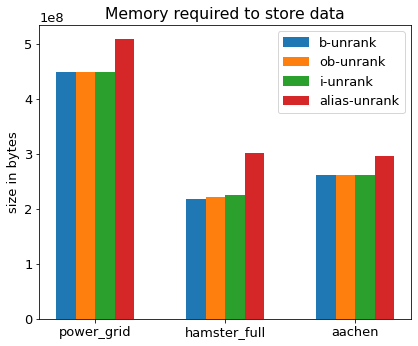

In [183]:
data = {i[0][:3]:  { e: calculate_mean_and_std(memory[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"memory_real")

plot_bar_chart(data, "", "size in bytes", "Memory required to store data", "memory_real.pdf", dim1 = 6, dim2 = 5, bar_w = 0.15)